# Pymaceuticals Cancer Treatment Drug Study Analysis

### Observations to Report

* There were relatively equal numbers of mice tested with each drug regimen.  (see bar chart below)<br>
* The ratio of male to female mice was relatively equal accross the entire drug study.  (see pie chart below)<br>
* Tumor volume appeared to decrease with use of Capomulin. (see line plot below)<br>
* There appeared to be a strong correlation in average tumor volume with mouse weight for the mice treated with Capomulin. (see correlation and regression plot below)<br>
* Although Capomulin was specifically analyzed with greater detail in this report, Ramicane also had similar statistics for average tumor volume and final tumor volume (both had lower means, variances, and SEMs when compared to the other drugs). (see summary statistics and box plots below)

### Data Merging and Cleaning

* Create a working data table from the two input data files.

In [1]:
# Library dependencies:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from numpy import random

# Define data filepaths:
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results:
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset:
CombinedData = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview:
CombinedData.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


* Determine the number of mice used.

In [2]:
# Count and display the number of rows and unique mice:
NumRows = CombinedData["Mouse ID"].count()
NumMice = CombinedData["Mouse ID"].nunique()
print(f"Total data points in CombinedData = {NumRows}")
print(f"Total mice in CombinedData = {NumMice}")

Total data points in CombinedData = 1893
Total mice in CombinedData = 249


* Determine if any of the mice have duplicated timepoints.

In [3]:
# Find and display all mice that have duplicated "Mouse ID" and "Timepoint":
DuplicateMice = CombinedData.loc[CombinedData.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
pd.DataFrame(DuplicateMice, columns=["Mouse ID"]).style.set_caption("Mice with Duplicated Timepoints:")

,Mouse ID
0,g989


* Show the data for any mouse/mice that has duplicated timepoints.

In [4]:
# Generate and display a table that contains only the data for the above mouse/mice:
DuplicatedData = CombinedData.loc[CombinedData["Mouse ID"].isin(DuplicateMice)]
DuplicatedData

#   NOTE:  
#
#   The tumor volume data was different for this mouse at the same timepoints indicating that
#   this mouse ID was probably mistakenly used to identify two different mice.  As there is no
#   way to differentiate what was the correct tumor volume for this mouse ID, all data for it
#   must be discarded.
#

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


* Remove from the original data table all data for any mouse/mice with duplicated timepoints.

In [5]:
# Create a new working data table by dropping any rows with the above duplicated data:
CleanData = CombinedData.drop(DuplicatedData.index)
CleanData.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


* Recount the number of mice that will be used in this analysis.

In [6]:
# Count and display the number of rows and unique mice:
NumRows = CleanData["Mouse ID"].count()
NumMice = CleanData["Mouse ID"].nunique()
print(f"Total data points in CleanData = {NumRows}")
print(f"Total mice in CleanData = {NumMice}")

Total data points in CleanData = 1880
Total mice in CleanData = 248


### Summary Statistics

* Create a table of summary statistics of tumor volumes for each of the drug regimens.<br>
Include: Mean, Median, Variance, Standard Deviation, and Standard Error of Means.

In [7]:
# Use groupby method to calculate the summary statistics:
Means = CleanData.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
Medians = CleanData.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
Variances = CleanData.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
SDevs = CleanData.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
SEMs = CleanData.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]

# Assemble the statistics into a dataframe and display:
SummaryStatistics1 = pd.DataFrame({
    "Mean": Means,
    "Median": Medians,
    "Variance": Variances,
    "Std. Dev.": SDevs,
    "SEM": SEMs
})
SummaryStatistics1.style.set_caption("Tumor Volume (mm3) Statistics for Each Drug Regimen:")

,Mean,Median,Variance,Std. Dev.,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


* Create a table of summary statistics of tumor volumes for each of the drug regimens (using a different method than above).<br>
Include: Mean, Median, Variance, Standard Deviation, and Standard Error of Means.

In [8]:
# Using the aggregation method, produce and display the same summary statistics as above:
SummaryStatistics2 = CleanData.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})
SummaryStatistics2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

### Bar and Pie Charts

* Using Pandas, generate a bar plot showing the total number of mice tested for each drug regimen.

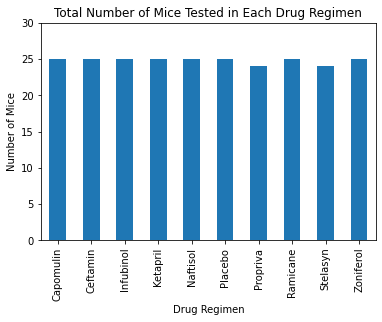

In [9]:
# Generate data that contains the number of unique mice used for each drug:
MiceCounts = CleanData.drop_duplicates("Mouse ID").groupby("Drug Regimen")["Mouse ID"].count()

# Generate and display the bar chart:
MiceCounts.plot(kind="bar")
plt.ylim(0,30)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Total Number of Mice Tested in Each Drug Regimen")
plt.show()

* Using Pyplot, generate a bar plot showing the total number of mice tested for each drug regiment.

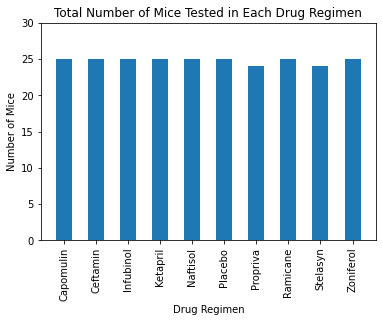

In [10]:
# Generate data that contains the number of unique mice used for each drug:
MiceCounts = CleanData.drop_duplicates("Mouse ID").groupby("Drug Regimen")["Mouse ID"].count()

# Generate and display the bar chart:
plt.bar(MiceCounts.index.values, MiceCounts.values, width=0.5)
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("Number of Mice")
plt.ylim(0,30)
plt.title("Total Number of Mice Tested in Each Drug Regimen")
plt.show()

* Using Pandas, generate a pie plot showing the distribution of female versus male mice used in the study.

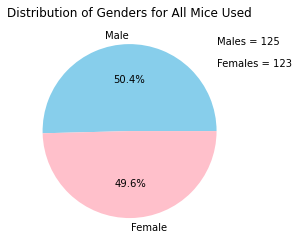

In [11]:
# Generate data that contains the number of unique mouse genders:
MouseGenders = CleanData.drop_duplicates("Mouse ID")["Sex"].value_counts()

# Generate and display the pie chart:
MouseGenders.plot(kind="pie", title = "Distribution of Genders for All Mice Used", label="", autopct="%1.1f%%", colors=["skyblue", "pink"])
plt.annotate(f"Males = {MouseGenders[0]}", xy=(1,1))
plt.annotate(f"Females = {MouseGenders[1]}", xy=(1,.75))
plt.show()

* Using Pyplot, generate a pie plot showing the distribution of female versus male mice used in the study.

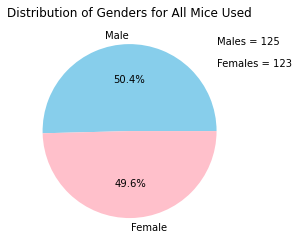

In [12]:
# Generate data that contains the number of unique mouse genders:
MouseGenders = CleanData.drop_duplicates("Mouse ID")["Sex"].value_counts()

# Generate and display the pie chart:
plt.pie(MouseGenders.values, labels=MouseGenders.index.values, autopct="%1.1f%%", colors=["skyblue", "pink"])
plt.title("Distribution of Genders for All Mice Used")
plt.annotate(f"Males = {MouseGenders[0]}", xy=(1,1))
plt.annotate(f"Females = {MouseGenders[1]}", xy=(1,.75))
plt.show()

### Quartiles, Outliers and Boxplots

* Filter the original data table to contain only data at each mouse's last timepoint.

In [13]:
# Find the last (greatest) timepoint for each mouse:
FinalTimepoints = CleanData.groupby("Mouse ID")["Timepoint"].max()
FinalTimepoints = FinalTimepoints.reset_index()

# Merge these timepoints with the CleanData table to keep only data at the last timepoint for each mouse:
EndingData = pd.merge(FinalTimepoints, CleanData, on=["Mouse ID", "Timepoint"], how="left")
EndingData.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


* Determine the IQR and outliers in Final Tumor Volume for each of the following drugs:  Capomulin, Ramicane, Infubinol, Ceftamin.

In [14]:
# Make a list of four drugs to use for looping and plot labels:
DrugList = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor volume data (this will become a list of series):
TumorVolumeList = []

# Loop through drugs and calculate the IQR and determine if there are any potential outliers:
for Drug in DrugList:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes:
    FinalTumorSize = EndingData.loc[EndingData["Drug Regimen"] == Drug, "Tumor Volume (mm3)"]
    
    # add subset: 
    TumorVolumeList.append(FinalTumorSize)
    
    # Determine outliers using upper and lower bounds:
    Quartiles = FinalTumorSize.quantile([0.25, 0.50, 0.75])
    LowerQ = Quartiles[0.25]
    UpperQ = Quartiles[0.75]
    IQR = UpperQ - LowerQ
    LowerBound = LowerQ - (1.5 * IQR)
    UpperBound = UpperQ + (1.5 * IQR)
    Outliers = FinalTumorSize.loc[(FinalTumorSize < LowerBound) | (FinalTumorSize > UpperBound)]
    
    # Output results:
    print(f"Final tumor size data for {Drug}:")
    print(f"  Upper quartile boundary: {UpperQ:.2f}")
    print(f"  Lower quartile boundary: {LowerQ:.2f}")
    print(f"  Interquartile Range: {IQR:.2f}")
    if len(Outliers) == 0:
        print("  Possible outliers: None")
    else:
        print(f"  Possible outliers: {Outliers.values}")
    print("")

Final tumor size data for Capomulin:
  Upper quartile boundary: 40.16
  Lower quartile boundary: 32.38
  Interquartile Range: 7.78
  Possible outliers: None

Final tumor size data for Ramicane:
  Upper quartile boundary: 40.66
  Lower quartile boundary: 31.56
  Interquartile Range: 9.10
  Possible outliers: None

Final tumor size data for Infubinol:
  Upper quartile boundary: 65.53
  Lower quartile boundary: 54.05
  Interquartile Range: 11.48
  Possible outliers: [36.3213458]

Final tumor size data for Ceftamin:
  Upper quartile boundary: 64.30
  Lower quartile boundary: 48.72
  Interquartile Range: 15.58
  Possible outliers: None



* Generate a box and whisker diagram of the final tumor volume of each mouse for each of the four drugs listed above.

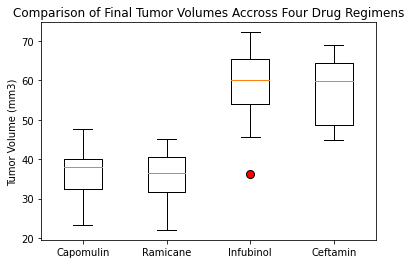

In [15]:
# Use the TumorVolume list generated above and display a box plot for each of it's drug regimens:
plt.boxplot(TumorVolumeList, labels=DrugList, flierprops={"markerfacecolor": "red", "markersize": 8})
plt.ylabel("Tumor Volume (mm3)")
plt.title("Comparison of Final Tumor Volumes Accross Four Drug Regimens")
plt.show()

### Line and Scatter Plots

* Generate a table of all mice that were treated with Capomulin.

In [16]:
# Use the CleanData table and filter it to contain only data for Capomulin:
CapomulinData = CleanData.loc[CleanData["Drug Regimen"] == "Capomulin"]
CapomulinData = CapomulinData.reset_index()
CapomulinData = CapomulinData.drop("index", axis=1)
CapomulinData.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,j246,0,45.0,0,Capomulin,Female,21,21
2,r554,0,45.0,0,Capomulin,Female,8,17
3,s185,0,45.0,0,Capomulin,Female,3,17
4,b742,0,45.0,0,Capomulin,Male,7,21


* Generate a line plot of tumor volume vs. time point for a random mouse treated with Capomulin.

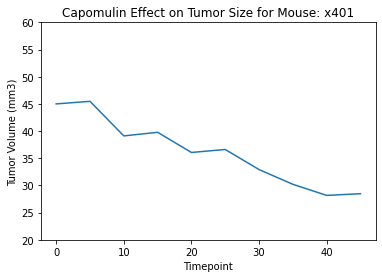

In [17]:
# Find a random Mouse ID contained in the above CapomulinData table:
RandomMouse = CapomulinData.iloc[random.choice(CapomulinData.index), 0]

# Use the random Mouse ID to get it's data:
SingleMouseData = CapomulinData.loc[CapomulinData["Mouse ID"] == RandomMouse]

# Plot the "Tumor Volume" data for that mouse:
plt.plot(SingleMouseData["Timepoint"], SingleMouseData["Tumor Volume (mm3)"])
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.ylim(20,60)
plt.title(f"Capomulin Effect on Tumor Size for Mouse: {RandomMouse}")
plt.show()

* Generate a scatter plot of average tumor volume per mouse vs. mouse weight for the Capomulin regimen.

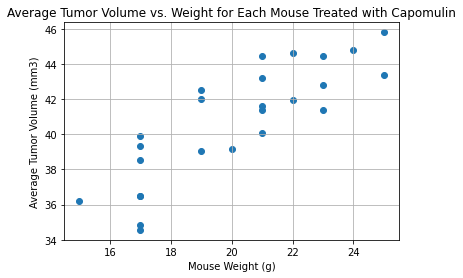

In [18]:
# Generate a dataframe containing the averages of each measurement for each mouse:
CapomulinAverage = CapomulinData.groupby("Mouse ID").mean()

# Plot a scatter diagram from the above dataframe using "Weight" and "Tumor Volume" columns:
plt.scatter(CapomulinAverage["Weight (g)"], CapomulinAverage["Tumor Volume (mm3)"])
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Tumor Volume vs. Weight for Each Mouse Treated with Capomulin")
plt.grid()
plt.show()

### Correlation and Regression

* Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen.

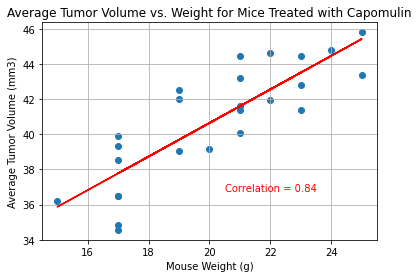

In [19]:
# Determine Pearson's r coefficient:
Correlation = round(st.pearsonr(CapomulinAverage["Weight (g)"], CapomulinAverage["Tumor Volume (mm3)"])[0],2)

# Use linregress to determine the slope and y-intercept (indexes 0 and 1) for the line of regression:
RegressionData = st.linregress(CapomulinAverage["Weight (g)"], CapomulinAverage["Tumor Volume (mm3)"])

# Using the slope and y-intercept from above, calculate the y-values for each Weight:
RegressionYValues = CapomulinAverage["Weight (g)"] * RegressionData[0] + RegressionData[1]

# Plot the scatter diagram again:
plt.scatter(CapomulinAverage["Weight (g)"], CapomulinAverage["Tumor Volume (mm3)"])
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Tumor Volume vs. Weight for Mice Treated with Capomulin")
plt.grid()

# Plot the line of regression and indicate the correlation coefficient:
plt.plot(CapomulinAverage["Weight (g)"], RegressionYValues, color="red")
plt.annotate(f"Correlation = {Correlation}", xy=(20.5,36.75), color="red")

plt.show()
